In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor as RF

# 1) Upload the dataset

In [2]:
data = pd.read_csv('data.csv')
data

,[H3PO3]/M,E (V vs RHE),Gas,[H3PO4]/M,[HClO4]/M,Catalyst,-5.0eV,-2.0eV,0.0eV,2.0eV,5.0eV,10.0eV,15.0eV
0,0.000000,0.1,N2,1,0,Pt on vulcan carbon,-0.005300,-0.012157,-0.022665,-0.016920,0.003958,0.012805,0.00804
1,0.000000,1.0,N2,1,0,Pt on vulcan carbon,0.000883,-0.000318,-0.000897,0.031103,0.045709,-0.005900,-0.01550
2,0.000002,0.1,N2,1,0,Pt on vulcan carbon,-0.002800,-0.008225,-0.010522,-0.014511,-0.000282,0.009668,0.00691
3,0.000002,0.5,N2,1,0,Pt on vulcan carbon,0.001380,0.004708,0.007214,0.004394,-0.001103,0.000354,0.00149
4,0.000002,1.0,N2,1,0,Pt on vulcan carbon,0.002390,0.003898,0.007804,0.038345,0.046077,-0.006018,-0.01518
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.000200,1.0,N2,0,1,PtCo_rGo,0.001090,0.005251,0.014530,0.044880,0.031511,-0.014494,-0.01382
72,0.000000,0.1,CO,0,1,PtCo_rGo,-0.007030,-0.022434,-0.047005,-0.033784,0.024118,0.017798,0.00349
73,0.000002,0.1,CO,0,1,PtCo_rGo,-0.007200,-0.021986,-0.036582,-0.028714,0.022154,0.015687,0.00664
74,0.000020,0.1,CO,0,1,PtCo_rGo,-0.007120,-0.027431,-0.049367,-0.034704,0.009906,0.015378,0.00384


#### Encode the gas and catalyst columns

In [3]:
X = data.iloc[:, :6]
y = data.iloc[:, 6:]

label_encoder = LabelEncoder()
catalyst = label_encoder.fit_transform(X['Catalyst'])
gas = label_encoder.fit_transform(X['Gas'])

X['Catalyst'] = catalyst
X['Gas'] = gas

In [4]:
X

,[H3PO3]/M,E (V vs RHE),Gas,[H3PO4]/M,[HClO4]/M,Catalyst
0,0.000000,0.1,1,1,0,0
1,0.000000,1.0,1,1,0,0
2,0.000002,0.1,1,1,0,0
3,0.000002,0.5,1,1,0,0
4,0.000002,1.0,1,1,0,0
...,...,...,...,...,...,...
71,0.000200,1.0,1,0,1,2
72,0.000000,0.1,0,0,1,2
73,0.000002,0.1,0,0,1,2
74,0.000020,0.1,0,0,1,2


In [5]:
y

,-5.0eV,-2.0eV,0.0eV,2.0eV,5.0eV,10.0eV,15.0eV
0,-0.005300,-0.012157,-0.022665,-0.016920,0.003958,0.012805,0.00804
1,0.000883,-0.000318,-0.000897,0.031103,0.045709,-0.005900,-0.01550
2,-0.002800,-0.008225,-0.010522,-0.014511,-0.000282,0.009668,0.00691
3,0.001380,0.004708,0.007214,0.004394,-0.001103,0.000354,0.00149
4,0.002390,0.003898,0.007804,0.038345,0.046077,-0.006018,-0.01518
...,...,...,...,...,...,...,...
71,0.001090,0.005251,0.014530,0.044880,0.031511,-0.014494,-0.01382
72,-0.007030,-0.022434,-0.047005,-0.033784,0.024118,0.017798,0.00349
73,-0.007200,-0.021986,-0.036582,-0.028714,0.022154,0.015687,0.00664
74,-0.007120,-0.027431,-0.049367,-0.034704,0.009906,0.015378,0.00384


# Random Forests model
NOTE: there are 7 targets (XANES intensities for seven arbitrarily chosen voltages)

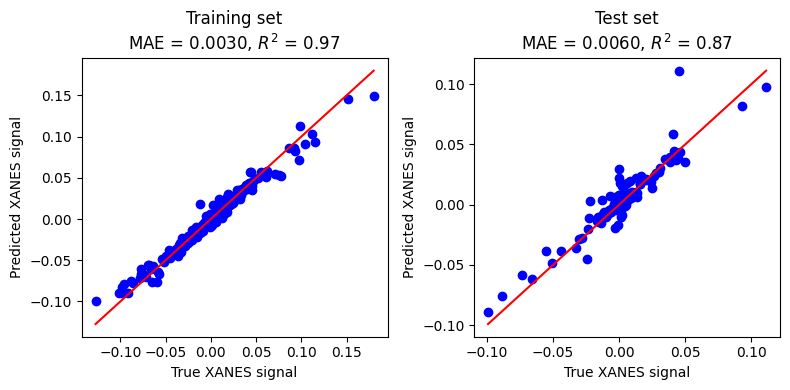

In [6]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# preprocess 
xscaler = MinMaxScaler()
yscaler = MinMaxScaler()
X_train_s = xscaler.fit_transform(X_train)
y_train_s = yscaler.fit_transform(y_train)
X_test_s = xscaler.transform(X_test)

# create/train the model
rf = RandomForestRegressor()
rf.fit(X_train_s, y_train_s)

# predictions on the training and test set
pred_test_s = rf.predict(X_test_s)
pred_test = yscaler.inverse_transform(pred_test_s)

pred_train_s = rf.predict(X_train_s)
pred_train = yscaler.inverse_transform(pred_train_s)

########################################################################
# parity plots (all 7 targets of each XANES curve are explicitly shown)
########################################################################
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
pred_train_flat = pred_train.reshape(-1)
y_train_flat = y_train.values.reshape(-1)
mae_train_flat = mean_absolute_error(y_train_flat, pred_train_flat)
r2_train_flat = r2_score(y_train_flat, pred_train_flat)
low, high = y_train_flat.min(), y_train_flat.max()
plt.plot(y_train_flat, pred_train_flat, 'bo')
plt.plot([low,high], [low,high], '-r')
plt.xlabel('True XANES signal')
plt.ylabel('Predicted XANES signal')
plt.title(f'Training set\nMAE = {mae_train_flat:.4f}, $R^2$ = {r2_train_flat:.2f}')

plt.subplot(1,2,2)
pred_test_flat = pred_test.reshape(-1)
y_test_flat = y_test.values.reshape(-1)
mae_test_flat = mean_absolute_error(y_test_flat, pred_test_flat)
r2_test_flat = r2_score(y_test_flat, pred_test_flat)
low, high = y_test_flat.min(), y_test_flat.max()
plt.plot(y_test_flat, pred_test_flat, 'bo')
plt.plot([low,high], [low,high], '-r')
plt.xlabel('True XANES signal')
plt.ylabel('Predicted XANES signal')
plt.title(f'Test set\nMAE = {mae_test_flat:.4f}, $R^2$ = {r2_test_flat:.2f}')
plt.tight_layout()

# Predictions on the test set, separated by XANES voltages

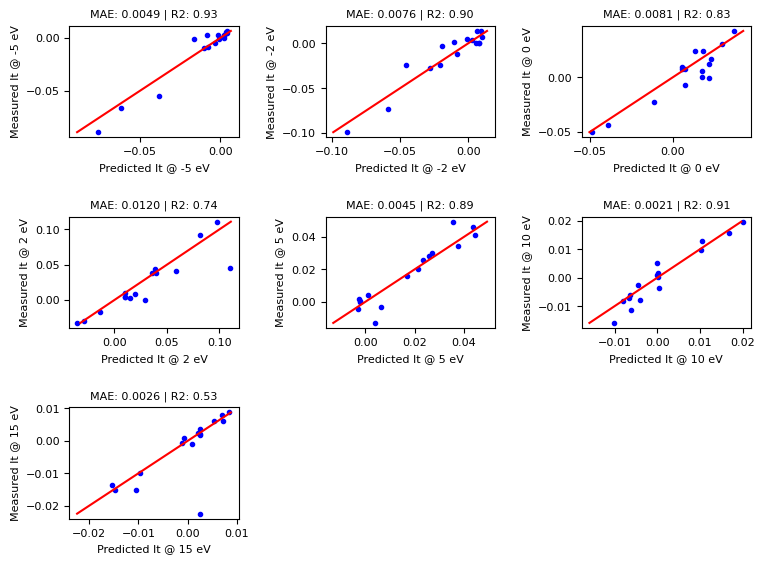

In [7]:
target_names = ['-5','-2','0','2','5','10','15'] # arbitrarily chosen voltages
plt.figure(figsize=(8,6))
s=8
for i in range(7): # There are seven targets (XANES intensities for seven arbitrarily chosen voltages)
    plt.subplot(3,3,i+1)
    ytrue = y_test.values[:,i]
    ycalc = pred_test[:,i]
    plt.plot(ycalc, ytrue, 'bo', ms=3)
    low,high = ytrue.max(), ytrue.min()
    plt.plot([low,high],[low,high],'-r')
    plt.xlabel(f'Predicted It @ {target_names[i]} eV', fontsize = s)
    plt.ylabel(f'Measured It @ {target_names[i]} eV', fontsize=s)
    plt.xticks(fontsize = s)
    plt.yticks(fontsize = s)
    mae = mean_absolute_error(ytrue,ycalc)
    r2 = r2_score(ytrue,ycalc)
    plt.title(f'MAE: {mae:.4f} | R2: {r2:.2f}', fontsize=s)
plt.tight_layout(pad = 2)